1. Chargement et Nettoyage des Données

Objectifs:
Charger les données CSV.
Vérifier la présence de valeurs manquantes et gérer ces valeurs.
Vérifier la qualité des données (par exemple, types de données appropriés, valeurs aberrantes).
Analyser les distributions des variables et leur validité.

In [1]:

import pandas as pd
import numpy as np

link ="C:/Users/Brice Daleu/Desktop/LEARNING PYTHON/Python learning/PYTHON PROJECT/car_prices.csv"
#Importer le dataset.
cars = pd.read_csv(link, sep=',', index_col='vin')
cars


,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
vin,,,,,,,,,,,,,,,
5xyktca69fg566472,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
5xyktca69fg561319,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
wba3c1c51ek116351,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
yv1612tb4f1310987,2015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
wba6b2c57ed129731,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
knalw4d4xf6019304,2015,Kia,K900,Luxury,Sedan,NaN,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
3c6td5et6cg112407,2012,Ram,2500,Power Wagon,Crew Cab,automatic,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
5uxzw0c58cl668465,2012,BMW,X5,xDrive35d,SUV,automatic,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)


In [3]:
#Identifier les valeurs manquantes ou incohérentes.
print(cars.isnull().sum())


year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


In [2]:
# Vérifier la présence de valeurs manquantes et gérer ces valeurs.
cars_cleaned = cars.dropna(subset=['saledate'])

print(cars_cleaned.isnull().sum())

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65351
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                26
sellingprice        0
saledate            0
dtype: int64


In [3]:
import pandas as pd
#Convertir les colonnes de type date (saledate) et numériques (year, odometer, sellingprice, etc.).
cars_cleaned.loc[:, 'saledate'] = pd.to_datetime(cars_cleaned['saledate'], errors='coerce', utc=True)

# utc=True : Spécifie que toutes les dates doivent être converties en UTC pour éviter le warning sur les fuseaux horaires mixtes.
# Utilisation de .loc[] : Cela assure que vous travaillez sur une copie de la colonne et évitez le

# Liste des colonnes à convertir en numériques
numeric_columns = ['year', 'odometer', 'sellingprice']  # Ajoutez d'autres colonnes si nécessaire

# Convertir les colonnes en numérique
for col in numeric_columns:
    cars_cleaned[col] = pd.to_numeric(cars_cleaned[col], errors='coerce')

C:\Users\Brice Daleu\AppData\Local\Temp\ipykernel_21872\3855077366.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cars_cleaned.loc[:, 'saledate'] = pd.to_datetime(cars_cleaned['saledate'], errors='coerce', utc=True)
C:\Users\Brice Daleu\AppData\Local\Temp\ipykernel_21872\3855077366.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_cleaned[col] = pd.to_numeric(cars_cleaned[col], errors='coerce')


In [4]:
cars_cleaned

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
vin,,,,,,,,,,,,,,,
5xyktca69fg566472,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 04:30:00+00:00
5xyktca69fg561319,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 04:30:00+00:00
wba3c1c51ek116351,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-14 20:30:00+00:00
yv1612tb4f1310987,2015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-28 20:30:00+00:00
wba6b2c57ed129731,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18 04:30:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
knalw4d4xf6019304,2015,Kia,K900,Luxury,Sedan,NaN,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,2015-07-09 00:00:00+00:00
3c6td5et6cg112407,2012,Ram,2500,Power Wagon,Crew Cab,automatic,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,2015-07-08 02:30:00+00:00
5uxzw0c58cl668465,2012,BMW,X5,xDrive35d,SUV,automatic,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,2015-07-08 02:30:00+00:00


In [5]:
# Supprimer les doublons et vérifier les valeurs aberrantes (par exemple, des prix de vente très élevés ou faibles).
#Etape 01 supprimer les doublons
cars_cleaned = cars_cleaned.drop_duplicates(keep='first')
# Etape 02 verifier les valeurs abberantes

In [6]:
import pandas as pd

# Supposons que 'cars_cleaned' soit votre DataFrame nettoyé

# Fonction pour identifier les outliers à l'aide de l'IQR
def detect_outliers(df, column):
    # Calculer les quartiles (Q1 et Q3) et l'IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Définir les bornes inférieure et supérieure
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifier les valeurs aberrantes
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers

# Vérifier les outliers dans 'sellingprice'
outliers_sellingprice = detect_outliers(cars_cleaned, 'sellingprice')
outliers_sellingprice


,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
vin,,,,,,,,,,,,,,,
wba6b2c57ed129731,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18 04:30:00+00:00
wbsfv9c51ed593089,2014,BMW,M5,Base,Sedan,automatic,ca,34.0,14943.0,black,black,the hertz corporation,69000.0,65000.0,2014-12-17 04:30:00+00:00
wauhgafc0en062916,2014,Audi,A6,3.0T Prestige quattro,Sedan,automatic,ca,48.0,14414.0,black,black,desert auto trade,47300.0,49750.0,2014-12-16 04:30:00+00:00
wa1lfafpxea085074,2014,Audi,Q5,2.0T Premium Plus quattro,SUV,automatic,ca,49.0,7983.0,white,black,audi north scottsdale,37100.0,40000.0,2014-12-18 04:30:00+00:00
wbayp9c53ed169260,2014,BMW,6 Series,650i,Convertible,automatic,ca,34.0,8819.0,black,black,the hertz corporation,68000.0,67200.0,2014-12-17 04:30:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zam39nka2d0068288,2013,NaN,NaN,NaN,NaN,automatic,ga,42.0,30148.0,off-white,black,maserati north america inc,58500.0,47000.0,2015-06-23 20:00:00+00:00
zam39jka1c0060738,2012,Maserati,Quattroporte,S,sedan,automatic,ga,39.0,21923.0,blue,—,maserati north america inc,53300.0,40250.0,2015-06-23 20:00:00+00:00
wddhf9cb9ea917688,2014,Mercedes-Benz,E-Class,E63 AMG 4MATIC,Sedan,automatic,ca,45.0,17518.0,black,black,the hertz corporation,64000.0,69500.0,2015-07-07 02:30:00+00:00


2. Exploration des Données (Exploratory Data Analysis - EDA)

In [7]:
#1.Quelle marque de véhicule a été la plus vendue en 2015 ?
# Cette question peut être explorée en analysant la colonne year et make.
#Step 01: Je recupere la liste des voitures vendus en 2015
cars_sold_2015 = cars_cleaned[cars_cleaned['year'] == 2015]
#Step 02: Compter les occurrences de chaque marque (make) en 2015
brand_counts_2015 = cars_sold_2015['make'].value_counts()
# Step 03: prendre la plus grande valeurs parmi les occurences
highest_number = brand_counts_2015.max()
# Step 04: Retrouver la marque de voiture a prtir de sa valeur
make_most_sold = brand_counts_2015[brand_counts_2015 == highest_number]
make_most_sold

make
Kia    1482
Name: count, dtype: int64

In [8]:
#2.Quel est le type de carrosserie (body) le plus populaire aux USA ?
#Cette question permet de voir quel type de véhicule (SUV, Sedan, etc.) domine le marché.
sold_body = cars_cleaned['body'].value_counts()
highest_score = sold_body.max()
most_popular_body = sold_body[sold_body == highest_score]
most_popular_body

body
Sedan    199429
Name: count, dtype: int64

In [9]:
#3.Quel est le prix de vente moyen des véhicules par type de transmission ?
#Analysez la colonne transmission pour observer la différence de prix selon le type de transmission.
#step 01: Trouver les types de transmissions
transmission_type = cars_cleaned['transmission'].value_counts()
#Step 02: Calculer le prix moyen de vente par type de transmission
average_price_by_transmission = cars_cleaned.groupby('transmission')['sellingprice'].mean()

# Afficher les résultats
average_price_by_transmission

transmission
Sedan        13686.363636
automatic    13540.406866
manual       11211.448358
sedan        13650.000000
Name: sellingprice, dtype: float64

In [10]:
#4.Comment la côte du véhicule (mmr) varie en fonction de son kilométrage (odometer) ?
#Examiner la relation entre l'odometer (kilométrage) et la côte du véhicule.
#Step 01: Je me rasssure que les deux colonnes ont le meme type de donnees
print(cars_cleaned[['odometer', 'mmr']].dtypes)
#Step 02: Je calcule la correlation
correlation = cars_cleaned[['odometer', 'mmr']].corr()
correlation


# Explication des données affichées :
# La diagonale principale montre toujours 1.000000, car une variable est toujours parfaitement corrélée avec elle-même.
# La valeur -0.588113 indique une corrélation négative modérée entre odometer et mmr.
# Cela signifie qu'à mesure que la valeur du odometer augmente, la valeur du mmr tend à diminuer.
# Autrement dit, plus un véhicule a un kilométrage élevé (odometer), plus sa valeur marchande (mmr) baisse.

odometer    float64
mmr         float64
dtype: object


,odometer,mmr
odometer,1.000000,-0.588113
mmr,-0.588113,1.000000


In [11]:
#5.Quelles sont les régions (états) où les prix de vente sont les plus élevés ?
#En utilisant la colonne state, on peut comparer les prix de vente (sellingprice) par état.
# Calcul du prix moyen de vente par état
average_price_by_state = cars_cleaned.groupby('state')['sellingprice'].mean()

# Trier les résultats par prix moyen décroissant
average_price_by_state_sorted = average_price_by_state.sort_values(ascending=False)

# Afficher les états avec les prix de vente les plus élevés
average_price_by_state_sorted


state
on    17812.623475
tn    17009.744341
pa    15976.303133
co    15877.798714
nv    15097.772014
          ...     
va     8574.737630
md     7409.753966
ok     6918.055556
ma     6726.742458
nm     6291.812865
Name: sellingprice, Length: 64, dtype: float64

In [12]:
#6.Quel modèle de véhicule génère les prix de vente les plus élevés ?
#En explorant les colonnes make, model et sellingprice, il est possible de comparer la performance des différents modèles.
average_price_by_car = cars_cleaned.groupby(['make', 'model'])['sellingprice'].mean()
# Trier les résultats par prix moyen décroissant
average_price_by_car_sorted = average_price_by_car.sort_values(ascending=False)

# Afficher les vehicules (Make and Model) avec les prix de vente les plus élevés
average_price_by_car_sorted

make           model         
Ferrari        458 Italia        183000.000000
Mercedes-Benz  SLS AMG GT        156500.000000
BMW            i8                154222.222222
Bentley        Flying Spur       154000.000000
Rolls-Royce    Ghost             153488.235294
                                     ...      
chevrolet      cavalier             300.000000
Dodge          Spirit               300.000000
Oldsmobile     Regency              300.000000
Ford           Windstar Cargo       281.250000
Toyota         Paseo                150.000000
Name: sellingprice, Length: 1019, dtype: float64

In [13]:
#7.Y a-t-il une différence de prix entre les véhicules neufs et d'occasion (en fonction de la colonne condition) ?
#Comparer les prix des véhicules selon leur état (condition).
# Créer un dictionnaire pour mapper les valeurs numériques de 'condition' aux labels textuels
condition_map = {
    5.0: "Excellent",
    4.0: "Good",
    3.0: "Fair",
    2.0: "Poor",
    1.0: "Salvage",
    15.0: "Certified Pre-Owned",
    14.0: "Certified Pre-Owned",
    13.0: "Certified Pre-Owned",
    12.0: "Certified Pre-Owned",
    11.0: "Certified Pre-Owned"
}

# Appliquer ce dictionnaire pour créer une nouvelle colonne avec les valeurs textuelles
cars_cleaned['condition_label'] = cars_cleaned['condition'].map(condition_map)

# Vous pouvez aussi afficher les prix moyens par condition pour analyser la relation
average_price_by_condition = cars_cleaned.groupby('condition_label')['sellingprice'].mean()
average_price_by_condition


condition_label
Certified Pre-Owned     3792.094096
Excellent              24724.724915
Fair                   12275.285410
Good                   17724.538902
Poor                    5691.410438
Salvage                 3923.135932
Name: sellingprice, dtype: float64

In [14]:
#8.Quelles sont les couleurs de véhicule les plus populaires ?
#Analyser les préférences de couleur via la colonne color.
cars_colors = cars_cleaned['color'].value_counts()
cars_colors

color
black        110969
white        106670
silver        83385
gray          82854
blue          51138
red           43569
—             24685
green         11382
gold          11342
beige          9222
burgundy       8972
brown          6717
orange         2078
purple         1561
off-white      1449
yellow         1285
charcoal        479
turquoise       236
pink             42
lime             15
9562              1
2846              1
18561             1
18384             1
5705              1
2817              1
6158              1
721               1
20627             1
20379             1
9837              1
9887              1
2172              1
339               1
6864              1
2711              1
11034             1
16633             1
6388              1
15719             1
12655             1
14872             1
1167              1
9410              1
4802              1
5001              1
Name: count, dtype: int64

In [15]:
#9.Comment les prix de vente ont évolué au fil des années (saledate) ?
#Observer l'évolution des prix des véhicules en fonction de la date de vente.
sales_evolution = cars_cleaned.groupby(['year'])['sellingprice'].mean()
sales_evolution

year
1982    12750.000000
1983     5250.000000
1984     2160.000000
1985     3520.000000
1986     2538.636364
1987     1512.500000
1988     3168.181818
1989     1620.000000
1990     1435.714286
1991      943.656716
1992      991.666667
1993      833.902439
1994      870.599490
1995      913.292546
1996      985.781434
1997     1157.454722
1998     1261.719404
1999     1533.696105
2000     1827.834130
2001     2131.014224
2002     2611.709315
2003     3447.268654
2004     4321.474455
2005     4893.989857
2006     6190.204808
2007     8021.969687
2008     9508.054092
2009    10462.313295
2010    12412.453313
2011    15851.677185
2012    16653.749836
2013    17476.602700
2014    20090.200535
2015    25932.117198
Name: sellingprice, dtype: float64

In [16]:
#10.Quel est le véhicule (marque/modèle) le plus vendu chaque mois/année ?
#Identifier les tendances temporelles des ventes par marque et modèle.
# Calculer les ventes par année, marque et modèle
sales_per_year_model = cars_cleaned.groupby(['year', 'make', 'model']).agg(
    total_sales=('sellingprice', 'sum'),  # Chiffre d'affaires total
    cars_sold=('sellingprice', 'count')   # Nombre de voitures vendues (occurrences)
).reset_index()

# Trouver le modèle le plus vendu chaque année (en termes de chiffre d'affaires)
top_sales_per_year = sales_per_year_model.loc[sales_per_year_model.groupby('year')['total_sales'].idxmax()]

top_sales_per_year
    

,year,make,model,total_sales,cars_sold
0,1984,chevrolet,corvette,3100.0,1
1,1985,chevrolet,corvette,7750.0,2
2,1986,chevrolet,corvette,8600.0,1
4,1987,mercedes,300e,300.0,1
5,1989,chevrolet,corvette,10100.0,2
10,1990,Chevrolet,C/K 1500 Series,26000.0,3
35,1991,Mercedes-Benz,500-Class,11700.0,5
57,1992,Lexus,SC 400,16150.0,7
118,1993,Toyota,Camry,19400.0,30
157,1994,Honda,Accord,42375.0,59


2.2. Visualisation et Analyse:

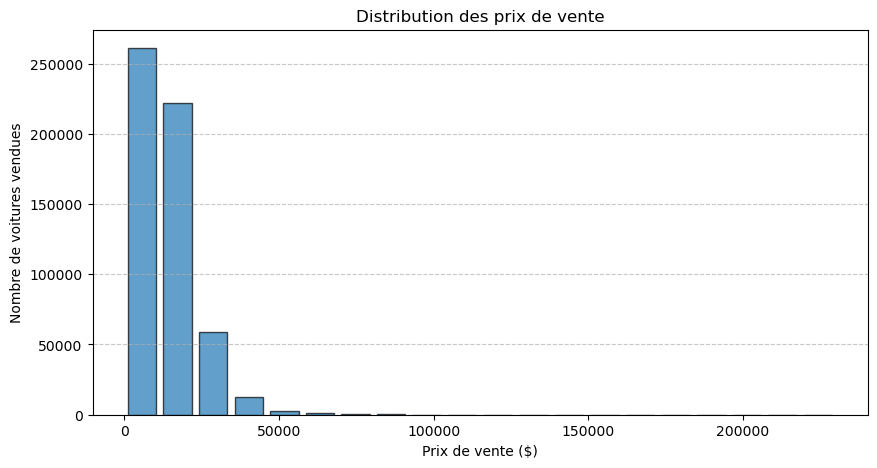

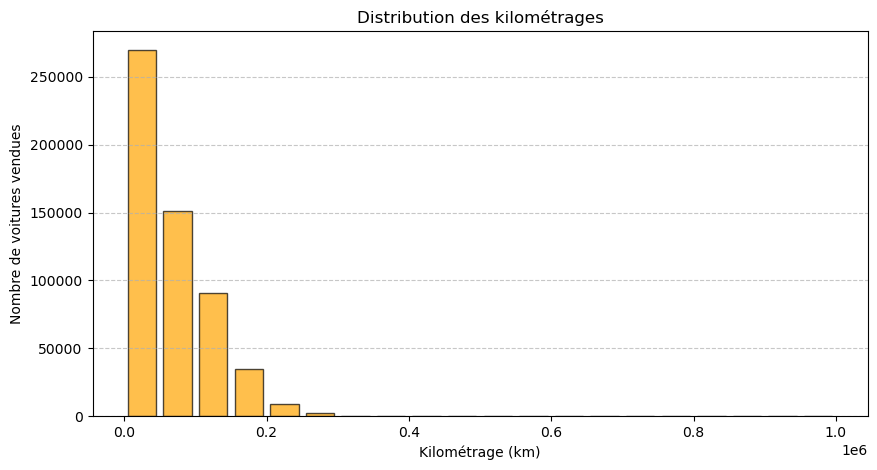

In [20]:
# Histogrammes pour la distribution des prix de vente et des kilométrages.

# Créer un histogramme pour le prix de vente (sellingprice).
# 
# L’axe Y : le nombre de voitures vendues dans chaque plage de prix.
# L’axe X : les plages de prix (ex : 0-5000€, 5000-10000€, etc.).

import pandas as pd
import matplotlib.pyplot as plt

# Création de l'histogramme du prix de vente (sellingprice)
plt.figure(figsize=(10, 5))  # Taille du graphique
plt.hist(cars_cleaned['sellingprice'], bins=20, edgecolor='black', alpha=0.7, rwidth=0.8)  # Histogramme

# Labels et titre
plt.xlabel('Prix de vente ($)')
plt.ylabel('Nombre de voitures vendues')
plt.title('Distribution des prix de vente')

# Ajout de la grille pour meilleure lisibilité
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher le graphique
plt.show()


# Création de l'histogramme pour la distribution des kilométrages (odometer)
plt.figure(figsize=(10, 5))  # Nouvelle figure
plt.hist(cars_cleaned['odometer'], bins=20, edgecolor='black', alpha=0.7, color='orange', rwidth=0.8)  # Histogramme
plt.xlabel('Kilométrage (km)')
plt.ylabel('Nombre de voitures vendues')
plt.title('Distribution des kilométrages')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


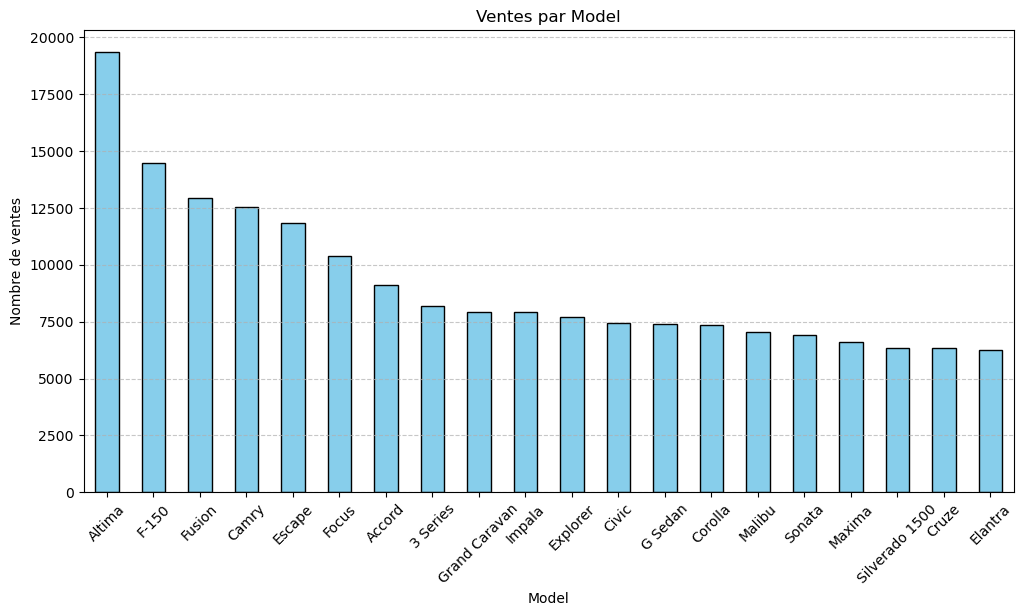

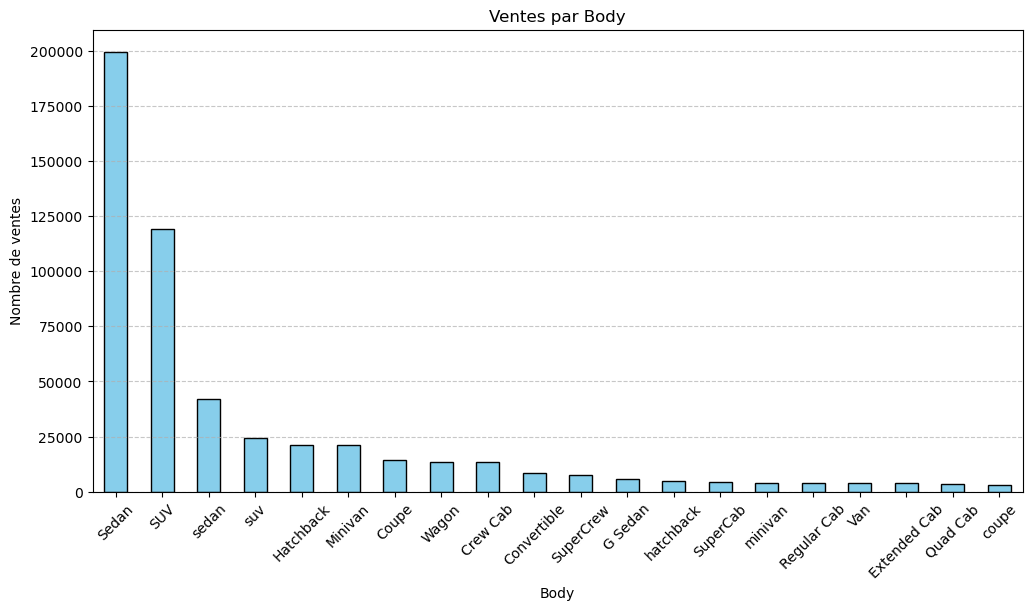

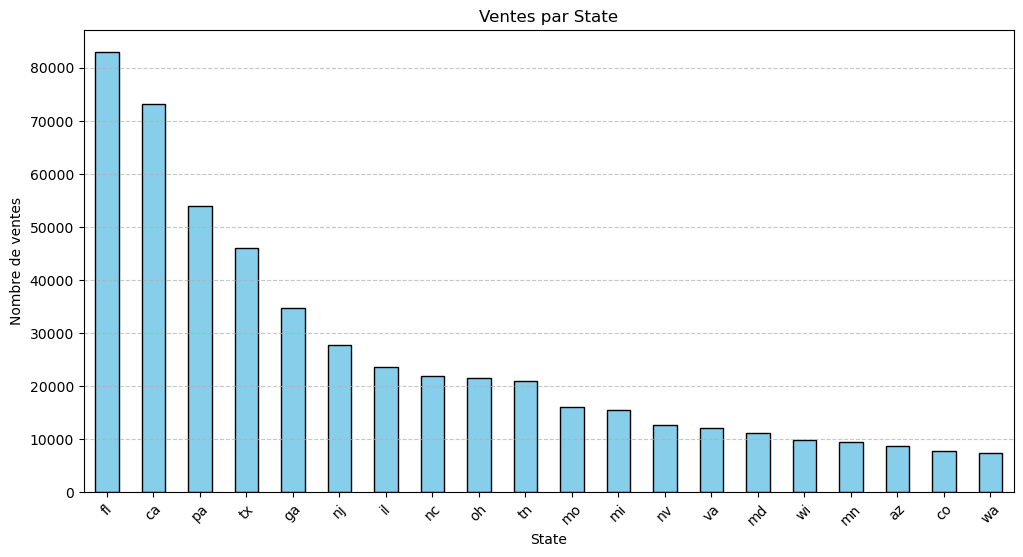

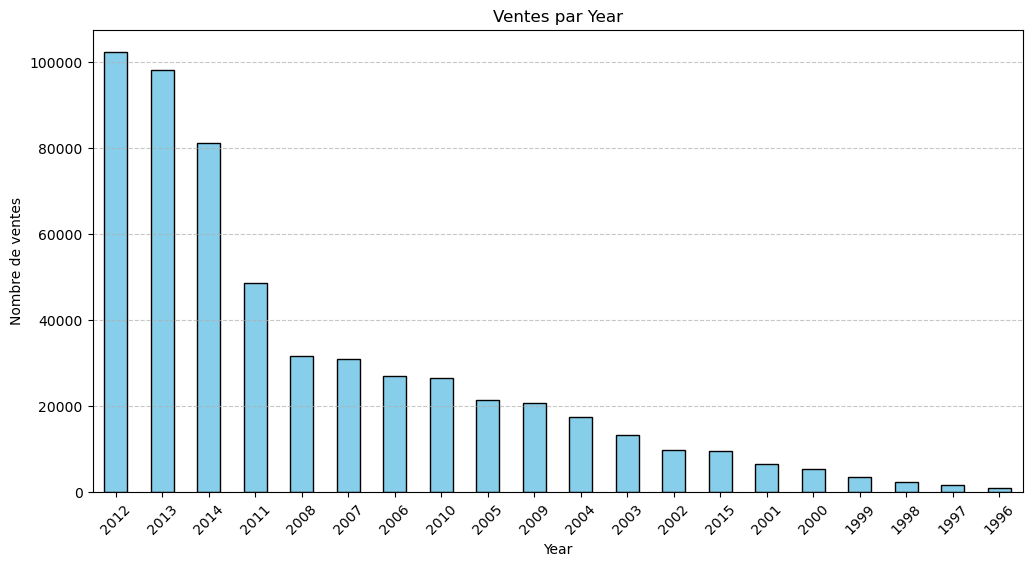

In [31]:
# Diagrammes en barres pour les ventes par marque (model), par type de carrosserie (body), ville (state), annee (year)

import pandas as pd
import matplotlib.pyplot as plt

# Supposons que 'cars_cleaned' est votre DataFrame contenant les ventes de voitures

# Liste des catégories à analyser
categories = ["model", "body", "state", "year"]

# Création des diagrammes en barres
for category in categories:
    plt.figure(figsize=(12, 6))  # Taille du graphique
    cars_cleaned[category].value_counts().head(20).plot(kind="bar", color="skyblue", edgecolor="black")

    # Labels et titre
    plt.xlabel(category.capitalize())
    plt.ylabel("Nombre de ventes")
    plt.title(f"Ventes par {category.capitalize()}")
    plt.xticks(rotation=45)  # Incline les labels pour meilleure lisibilité
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Affichage du graphique
    plt.show()


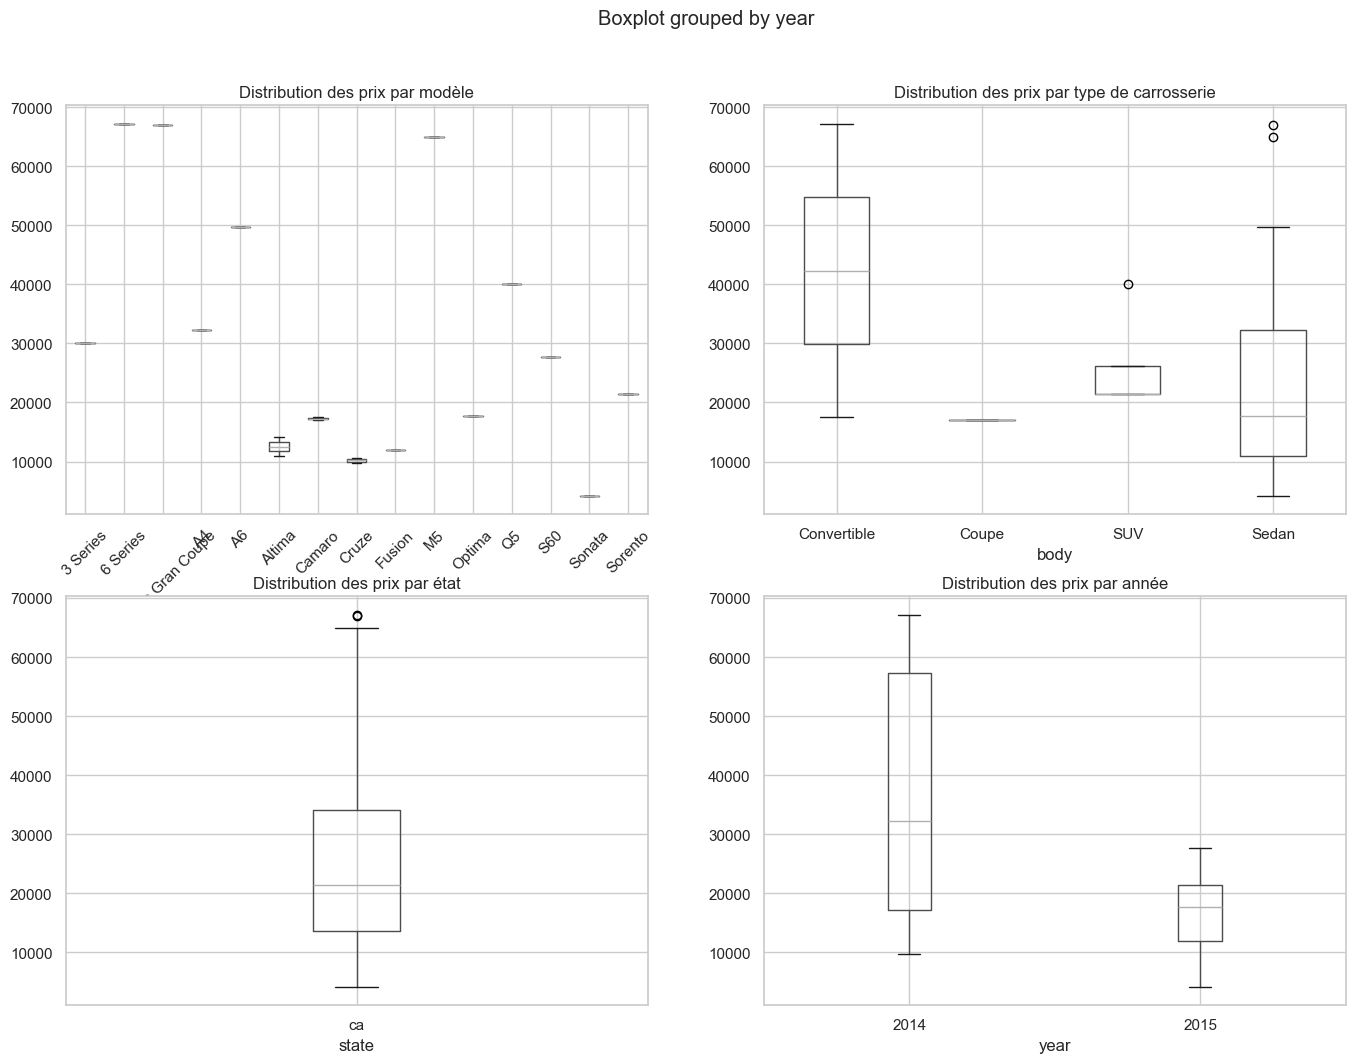

In [38]:
# Boîtes à moustaches (boxplots) pour visualiser la dispersion des prix selon différents critères.

import pandas as pd
import matplotlib.pyplot as plt
# Définir le style

# Création des boxplots pour différents critères
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Boxplot selon le modèle
cars_cleaned.head(20).boxplot(column="sellingprice", by="model", ax=axes[0, 0])
axes[0, 0].set_title("Distribution des prix par modèle")
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)

# Boxplot selon le type de carrosserie (body)
cars_cleaned.head(20).boxplot(column="sellingprice", by="body",  ax=axes[0, 1])
axes[0, 1].set_title("Distribution des prix par type de carrosserie")

# Boxplot selon l'état (state)
cars_cleaned.head(20).boxplot(column="sellingprice", by="state",  ax=axes[1, 0])
axes[1, 0].set_title("Distribution des prix par état")

# Boxplot selon l'année (year)
cars_cleaned.head(20).boxplot(column="sellingprice", by="year", ax=axes[1, 1])
axes[1, 1].set_title("Distribution des prix par année")

# Afficher le graphique
plt.show()




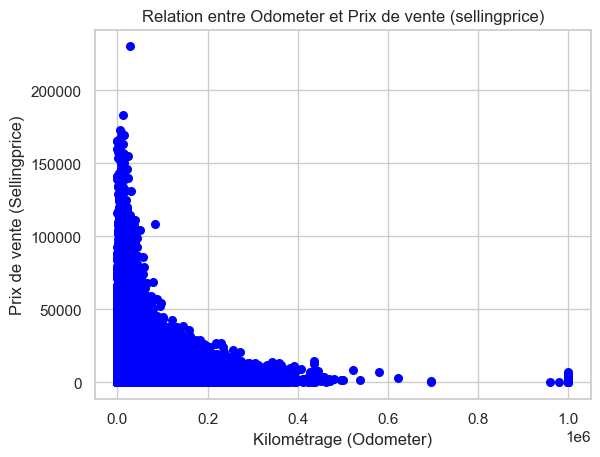

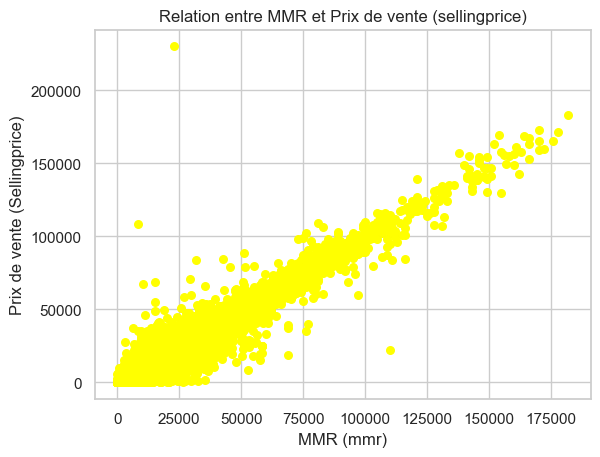

In [49]:
# Nuages de points (scatter plots) pour explorer les relations entre le prix de vente et d'autres variables (par exemple, odometer vs mmr).


cars_cleaned.plot(x="odometer", y="sellingprice", s=30, c="blue", kind="scatter")
# Ajouter les titres et labels
plt.title("Relation entre Odometer et Prix de vente (sellingprice)")
plt.xlabel("Kilométrage (Odometer)")
plt.ylabel("Prix de vente (Sellingprice)")


cars_cleaned.plot(x="mmr", y="sellingprice", s=30, c="yellow", kind="scatter")
# Ajouter les titres et labels
plt.title("Relation entre MMR et Prix de vente (sellingprice)")
plt.xlabel("MMR (mmr)")
plt.ylabel("Prix de vente (Sellingprice)")



plt.show()

3. Analyse Statistique et Insights

In [50]:
# 1 Statistiques descriptives : Calcul des moyennes, médianes, écarts-types pour des variables clés comme sellingprice, mmr, odometer.

#Step 01: Calcul des moyennes: sellingprice, mmr, odometer.
moyenne_sellingprice = cars_cleaned['sellingprice'].mean()
moyenne_mmr = cars_cleaned['mmr'].mean()
moyenne_odometer = cars_cleaned['odometer'].mean()

#Step 02: Calcul des medianes: sellingprice, mmr, odometer.
median_sellingprice = cars_cleaned['sellingprice'].median()
median_mmr = cars_cleaned['mmr'].median()
median_odometer = cars_cleaned['odometer'].median()

#Step 03: Calcul des ecarts-types: sellingprice, mmr, odometer.
ecartype_sellingprice = cars_cleaned['sellingprice'].std()
ecartype_mmr = cars_cleaned['mmr'].std()
ecartype_odometer = cars_cleaned['odometer'].std()

In [51]:
# 2 Corrélations : Analyse des corrélations entre les variables numériques comme sellingprice, mmr, odometer, etc.

details_correlation = cars_cleaned[['odometer', 'mmr', 'sellingprice']].corr()
details_correlation

,odometer,mmr,sellingprice
odometer,1.000000,-0.588113,-0.582393
mmr,-0.588113,1.000000,0.983635
sellingprice,-0.582393,0.983635,1.000000


In [43]:
# 3 Comparaison des groupes : Comparer les prix de vente selon différents groupes (marque, état, type de carrosserie, etc.)
# Moyenne du prix de vente par marque, état et type de carrosserie
comparaison_model = cars_cleaned.groupby("model")["sellingprice"].mean().sort_values(ascending=False)
comparaison_state = cars_cleaned.groupby("state")["sellingprice"].mean().sort_values(ascending=False)
comparaison_body = cars_cleaned.groupby("body")["sellingprice"].mean().sort_values(ascending=False)

In [46]:
comparaison_model


model
458 Italia        183000.000000
SLS AMG GT        156500.000000
i8                154222.222222
Flying Spur       154000.000000
Ghost             153488.235294
                      ...      
Spirit               300.000000
cavalier             300.000000
300e                 300.000000
Windstar Cargo       281.250000
Paseo                150.000000
Name: sellingprice, Length: 973, dtype: float64

In [48]:
comparaison_body

body
granturismo convertible    79041.666667
GranTurismo Convertible    74000.000000
CTS-V Wagon                50500.000000
cts-v coupe                39707.142857
CTS-V Coupe                38425.750000
                               ...     
Xtracab                     5818.750000
xtracab                     5250.000000
Club Cab                    4650.064103
Cab Plus                    2825.000000
Ram Van                     1200.000000
Name: sellingprice, Length: 87, dtype: float64

In [49]:
comparaison_state

state
on    17812.623475
tn    17009.744341
pa    15976.303133
co    15877.798714
nv    15097.772014
          ...     
va     8574.737630
md     7409.753966
ok     6918.055556
ma     6726.742458
nm     6291.812865
Name: sellingprice, Length: 64, dtype: float64

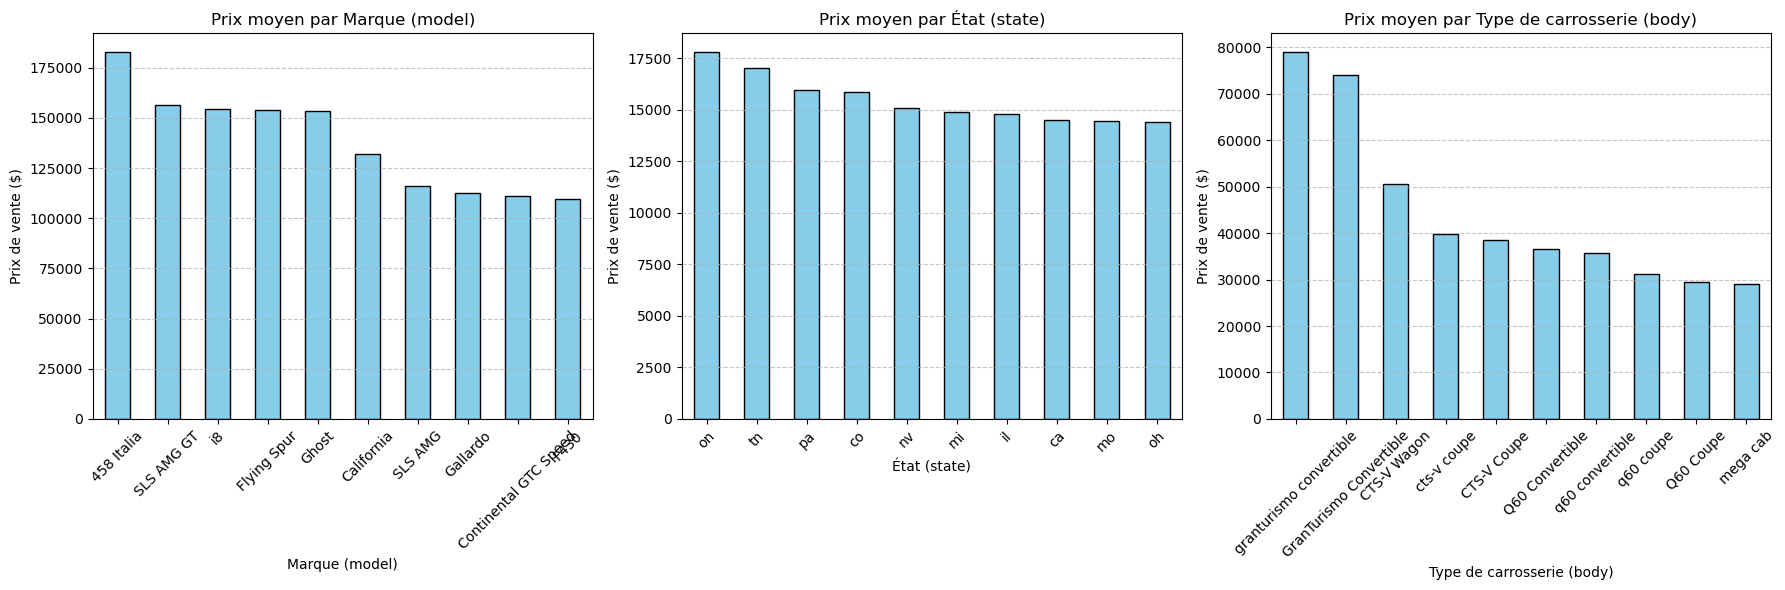

In [52]:
import matplotlib.pyplot as plt

# Définition des comparaisons
comparisons = {
    "Marque (model)": comparaison_model.head(10),
    "État (state)": comparaison_state.head(10),
    "Type de carrosserie (body)": comparaison_body.head(10)
}

# Création des graphiques
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 3 graphiques côte à côte

for ax, (label, data) in zip(axes, comparisons.items()):
    data.plot(kind="bar", ax=ax, color="skyblue", edgecolor="black")
    ax.set_title(f"Prix moyen par {label}")
    ax.set_xlabel(label)
    ax.set_ylabel("Prix de vente ($)")
    ax.set_xticklabels(data.index, rotation=45)  # Rotation pour lisibilité
    ax.grid(axis="y", linestyle="--", alpha=0.7)

# Affichage
plt.tight_layout()
plt.show()


4. Modélisation (Facultatif)

Si nécessaire, on peut essayer de prédire les prix de vente en utilisant des modèles de régression ou d’apprentissage automatique pour comprendre les facteurs clés influençant les prix.

In [57]:
# Régression linéaire pour prédire sellingprice à partir de caractéristiques telles que odometer, make, year, etc.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Supposons que `cars_cleaned` contient les données
features = ["odometer", "make", "year"]  # Variables explicatives
target = "sellingprice"  # Variable cible

# Sélectionner les données pertinentes
data = cars_cleaned[features + [target]].dropna()  # Supprimer les valeurs manquantes

# Séparer X (variables explicatives) et y (variable cible)
X = data[features]
y = data[target]

X = pd.get_dummies(X, columns=["make"], drop_first=True)  # Encodage des catégories

scaler = StandardScaler()
X[["odometer", "year"]] = scaler.fit_transform(X[["odometer", "year"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialisation du modèle
model = LinearRegression()

# Entraînement du modèle
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


In [54]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE) : {mae:.2f}")
print(f"Mean Squared Error (MSE) : {mse:.2f}")
print(f"Root Mean Squared Error (RMSE) : {rmse:.2f}")
print(f"R² Score : {r2:.2f}")


Mean Absolute Error (MAE) : 4390.05
Mean Squared Error (MSE) : 40610553.09
Root Mean Squared Error (RMSE) : 6372.64
R² Score : 0.58


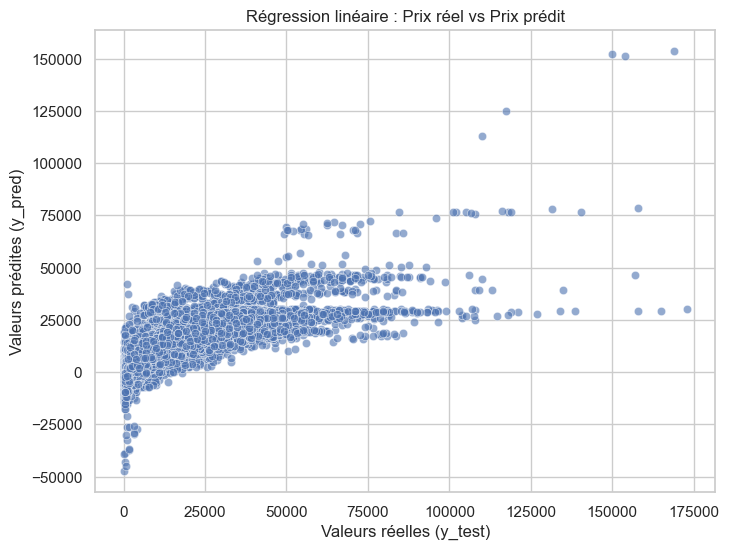

In [55]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Valeurs réelles (y_test)")
plt.ylabel("Valeurs prédites (y_pred)")
plt.title("Régression linéaire : Prix réel vs Prix prédit")
plt.show()
